In [1]:
import linkpred
from linkpred.evaluation import Pair
import networkx as nx
import random
import itertools
from operator import itemgetter
import pickle
import matplotlib.pyplot as plt

In [2]:
path = "../DataSet FFF/"

In [3]:
path_graph = "../DataSet FFF/Graph_data/"

In [4]:
saved_path = "../DataSet FFF/LinkPrediction_task/597/"

In [5]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10361\nNumber of edges: 63960\nAverage degree:  12.3463'

# 1) Set preparation

In [7]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)

In [8]:
sample_nodes = []
for i in sorted_degree:
    if i[1] > 50:
        sample_nodes.append(i[0])
print(len(sample_nodes))

257


In [9]:
new_graph = G.subgraph(sample_nodes)

print(len(new_graph.nodes()))
print(len(new_graph.edges()))

training_edge_len = len(new_graph.edges()) - int(len(new_graph.edges())/100 * 20)
test_edge_len = len(new_graph.edges()) - training_edge_len

257
5901


In [10]:
print(training_edge_len)
print(test_edge_len)

4721
1180


In [11]:
training_edges = random.sample(new_graph.edges, training_edge_len)

In [12]:
training_edges

[('klimaschutz', 'climatejustice'),
 ('nonazis', 'köln'),
 ('carbon', 'energy'),
 ('fridayfun', 'fridaythoughts'),
 ('climatecrisis', 'schoolstrike4climate'),
 ('boomersforclimatejustice', 'biodiversity'),
 ('climatecrisis', 'greta'),
 ('berlin', 'hambibleibt'),
 ('klimapaket', 'neustartklima'),
 ('klimakrise', 'spd'),
 ('australia', 'demvoice1'),
 ('nature', 'art'),
 ('eu', 'klima'),
 ('気候危機', 'globalclimatestrike'),
 ('stayathome', 'covid_19'),
 ('corona', 'klima'),
 ('netzstreikfürsklima', 'corona'),
 ('gretathunberg', 'fridayvibes'),
 ('renewables', 'globalwarming'),
 ('grüne', 'cdu'),
 ('tempolimit', 'ampel'),
 ('sustainable', 'demvoice1'),
 ('klimastreik', 'endegelaende'),
 ('greenenergy', 'earth'),
 ('love', 'climatecrisis'),
 ('nomoreemptypromises', 'corona'),
 ('dannibleibt', 'fridaysforfuture'),
 ('rt', 'co2'),
 ('climateaction', 'sustainable'),
 ('schoolstrike4climate', 'howdareyou'),
 ('climatejusticenow', 'clima'),
 ('klimakrise', 'extinctionrebellion'),
 ('tiredearth', 'x

2) Create training and test set

In [13]:
training = new_graph.edge_subgraph(training_edges)

In [14]:
print(nx.info(training))

Name: 
Type: Graph
Number of nodes: 257
Number of edges: 4721
Average degree:  36.7393


In [15]:
test = new_graph.copy()
test.remove_edges_from(training.edges())

In [16]:
print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 257
Number of edges: 1180
Average degree:   9.1829


4) Create node set

In [17]:
nodes = list(new_graph.nodes())
nodes.extend(list(test.nodes()))

5) Compute pair test set and universe set

In [18]:
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [19]:
print(len(universe))

32896


6) Storage file

In [20]:
universe

{Pair('keingradweiter', 'fridaymotivation'),
 Pair('hambibleibt', 'bundestag'),
 Pair('sosamazonia', 'davos2020'),
 Pair('sustainability', 'endegelaende'),
 Pair('klimastreik', 'alledoerferbleiben'),
 Pair('気候危機', 'grüne'),
 Pair('floods', 'climateaction'),
 Pair('neubauer', 'extinctionrebellion'),
 Pair('plasticpollution', 'comics'),
 Pair('london', 'demokratie'),
 Pair('climatejustice', 'beautiful'),
 Pair('klimapolitik', 'hambibleibt'),
 Pair('fightclimateinjustice', 'environment'),
 Pair('nrw', 'green'),
 Pair('youthforclimate', 'fridayforfuture'),
 Pair('rassismus', 'cdu'),
 Pair('fridaysforfuture', 'davos2020'),
 Pair('kohleausstieg', 'greenpeace'),
 Pair('flattenthecurve', 'carbon'),
 Pair('london', 'climateactionnow'),
 Pair('globalclimatejustice', 'fcknzs'),
 Pair('keepitintheground', 'coronavirus'),
 Pair('klimabewegung', 'cdu'),
 Pair('klimagerechtigkeit', 'antifa'),
 Pair('pollution', 'digitalstrike'),
 Pair('noafd', 'fridaythoughts'),
 Pair('luisaneubauer', 'keepitinthegro

In [21]:
with open(saved_path+'universe_597.pickle', 'wb') as f:
    pickle.dump(universe, f)
with open(saved_path+'test_597.pickle', 'wb') as f:
    pickle.dump(test, f) 
nx.write_graphml(training, saved_path+"training_597.graphml")

# 2) Prediction

1) Read data

In [22]:
with open(saved_path+'universe_597.pickle', 'rb') as f:
    universe = pickle.load(f)
with open(saved_path+'test_597.pickle', 'rb') as f:
    test = pickle.load(f)
training = nx.read_graphml(saved_path+"training_597.graphml")

2) Predictions

In [23]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

In [24]:
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

In [25]:
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [26]:
kz = linkpred.predictors.Katz(training, excluded=training.edges())
kz_results = kz.predict()

Computing matrix powers: [############################################################] 5/5


In [27]:
simrank = linkpred.predictors.SimRank(training, excluded=training.edges())
simrank_results = simrank.predict()

3) Saved predictions

In [28]:
with open(saved_path+'aa_results.pickle', 'wb') as f:
    pickle.dump(aa_results, f)
with open(saved_path+'cn_results.pickle', 'wb') as f:
    pickle.dump(cn_results, f) 
with open(saved_path+'jc_results.pickle', 'wb') as f:
    pickle.dump(jc_results, f) 
with open(saved_path+'kz_results.pickle', 'wb') as f:
    pickle.dump(kz_results, f) 
with open(saved_path+'simrank_results.pickle', 'wb') as f:
    pickle.dump(simrank_results, f) 

3) Evaluation

In [29]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

In [30]:
with open(saved_path+'cn_evaluation.pickle', 'wb') as f:
    pickle.dump(cn_evaluation, f) 

In [31]:
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)

In [32]:
with open(saved_path+'aa_evaluation.pickle', 'wb') as f:
    pickle.dump(aa_evaluation, f) 

In [33]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

In [34]:
with open(saved_path+'jc_evaluation.pickle', 'wb') as f:
    pickle.dump(jc_evaluation, f) 

In [35]:
kz_evaluation = linkpred.evaluation.EvaluationSheet(kz_results, test, universe)

In [36]:
with open(saved_path+'kz_evaluation.pickle', 'wb') as f:
    pickle.dump(kz_evaluation, f) 

In [37]:
simrank_evaluation = linkpred.evaluation.EvaluationSheet(simrank_results, test, universe)

In [38]:
with open(saved_path+'simrank_evaluation.pickle', 'wb') as f:
    pickle.dump(simrank_evaluation, f) 

In [39]:
res = []
for i, j in zip(cn_results, cn_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'cn_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [40]:
res = []
for i, j in zip(aa_results, aa_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'aa_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [41]:
res = []
for i, j in zip(jc_results, jc_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'jc_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [42]:
res = []
for i, j in zip(kz_results, kz_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'kz_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [43]:
res = []
for i, j in zip(simrank_results, simrank_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'simrank_results.pickle', 'wb') as f:
    pickle.dump(res, f)

# 3) Result Analysis

In [44]:
with open(saved_path+'aa_evaluation.pickle', 'rb') as f:
    aa_evaluation = pickle.load(f)
with open(saved_path+'aa_results.pickle', 'rb') as f:
    aa_results = pickle.load(f)
    
with open(saved_path+'cn_evaluation.pickle', 'rb') as f:
    cn_evaluation = pickle.load(f)
with open(saved_path+'cn_results.pickle', 'rb') as f:
    cn_results = pickle.load(f)

with open(saved_path+'jc_evaluation.pickle', 'rb') as f:
    jc_evaluation = pickle.load(f)
with open(saved_path+'jc_results.pickle', 'rb') as f:
    jc_results = pickle.load(f)

with open(saved_path+'kz_evaluation.pickle', 'rb') as f:
    kz_evaluation = pickle.load(f)
with open(saved_path+'kz_results.pickle', 'rb') as f:
    kz_results = pickle.load(f)

with open(saved_path+'simrank_evaluation.pickle', 'rb') as f:
    sm_evaluation = pickle.load(f)
with open(saved_path+'simrank_results.pickle', 'rb') as f:
    sm_results = pickle.load(f)

In [45]:
def print_res(res):
    res=sorted(res,key=lambda x: x[1],reverse=True)
    for i in res[:10]:
        print(i)

In [46]:
print_res(aa_results)
print("")
print("")
print("")
print_res(cn_results)
print("")
print("")
print("")
print_res(jc_results)
print("")
print("")
print("")
print_res(kz_results)
print("")
print("")
print("")
print_res(sm_results)

[Pair('fridaysforfuture', 'climatechange'), 33.48718846088674]
[Pair('climatestrike', 'climatechange'), 29.375958248452122]
[Pair('fridaysforfuture', 'extinctionrebellion'), 27.128977915913733]
[Pair('fridayforfuture', 'climatestrike'), 26.42502647150644]
[Pair('climateemergency', 'climateaction'), 23.836220856563614]
[Pair('fridayforfuture', 'climateemergency'), 22.570589382806517]
[Pair('climatestrike', 'climate'), 20.86408699217654]
[Pair('climatestrike', 'climatejustice'), 20.529962279212583]
[Pair('climatejustice', 'climatechange'), 19.237592666198164]
[Pair('schoolstrike4climate', 'climatestrike'), 19.11276048794926]



[Pair('fridaysforfuture', 'climatechange'), 115.0]
[Pair('climatestrike', 'climatechange'), 101.0]
[Pair('fridaysforfuture', 'extinctionrebellion'), 98.0]
[Pair('fridayforfuture', 'climatestrike'), 93.0]
[Pair('climateemergency', 'climateaction'), 85.0]
[Pair('fridayforfuture', 'climateemergency'), 82.0]
[Pair('climatestrike', 'climate'), 76.0]
[Pair('climatestrik

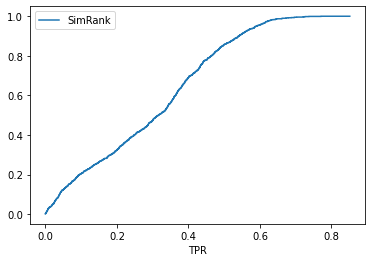

In [47]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")

plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

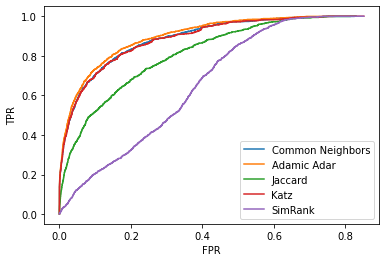

In [48]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

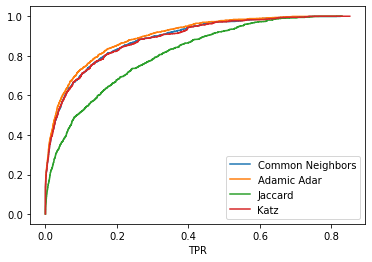

In [49]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

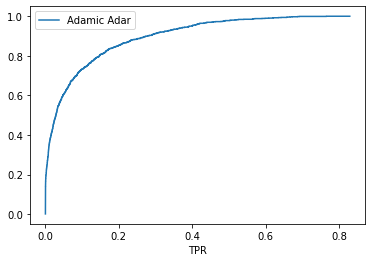

In [50]:
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

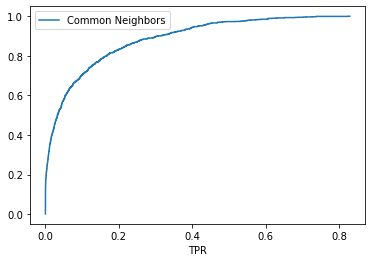

In [51]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

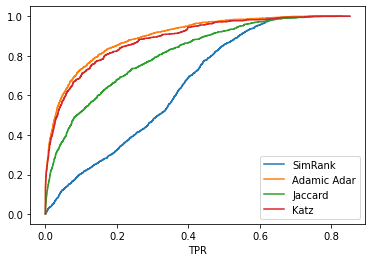

In [52]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

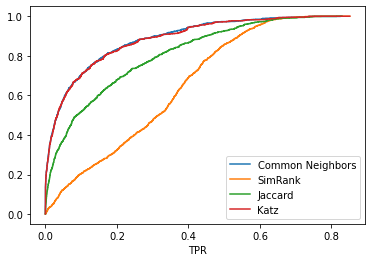

In [53]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
print(f"SimRank: \t {auc(sm_evaluation.fallout(), sm_evaluation.recall())}")
print(f"Katz:\t \t {auc(kz_evaluation.fallout(), kz_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.7322472643866861
Adamic Adar: 	 0.7419807892503597
Jaccard: 	 0.66434190303349
SimRank: 	 0.5525368418014968
Katz:	 	 0.7525863008779187


In [55]:
preds = list(nx.preferential_attachment(training,universe))
pref_results=[]
for u, v, p in preds:
    #print('(%s, %s) -> %d' % (u, v, p))
    pref_results.append([u,v,p])
pref_results=sorted(pref_results,key=lambda x: x[2],reverse=True)
pref_results

[['fridaysforfuture', 'climatestrike', 32314],
 ['fridaysforfuture', 'climatecrisis', 31030],
 ['fridaysforfuture', 'climatechange', 28676],
 ['fridaysforfuture', 'fridayforfuture', 28462],
 ['fridaysforfuture', 'climateemergency', 28248],
 ['fridaysforfuture', 'climateaction', 28034],
 ['gretathunberg', 'fridaysforfuture', 25680],
 ['fridaysforfuture', 'extinctionrebellion', 24824],
 ['fridaysforfuture', 'climate', 23326],
 ['klimaschutz', 'fridaysforfuture', 22898],
 ['fridaysforfuture', 'fff', 22898],
 ['klimastreik', 'fridaysforfuture', 22470],
 ['fridaysforfuture', 'climateactionnow', 22042],
 ['climatestrike', 'climatecrisis', 21895],
 ['fridaysforfuture', 'climatejustice', 20972],
 ['climatestrike', 'climatechange', 20234],
 ['fridayforfuture', 'climatestrike', 20083],
 ['climatestrike', 'climateemergency', 19932],
 ['climatestrike', 'climateaction', 19781],
 ['climatecrisis', 'climatechange', 19430],
 ['fridayforfuture', 'climatecrisis', 19285],
 ['fridaysforfuture', 'co2', 192

In [56]:
def intersect(result_1, result_2, dim, name):
    print(f"{name}")
    int_1_2=[]
    count=0
    for item_1 in result_1[:300]:
        for item_2 in result_2[:300]:
            if item_1[0]==item_2[0]:
                print('intersezione:',item_1[0])
                int_1_2.append(item_1[0])
                count+=1
    print(count)
    return int_1_2

In [57]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [58]:
aa_cn = intersect(aa_results, cn_results, 300, "AA vs CN")
aa_jc = intersect(aa_results, jc_results, 300, "AA vs JC")
aa_kz = intersect(aa_results, kz_results, 300, "AA vs KZ")
aa_sm = intersect(aa_results, sm_results, 300, "AA vs SM")


AA vs CN
intersezione: vegan - datteln4
intersezione: vegan - gruene
intersezione: vegan - rt
intersezione: youthstrike4climate - vegan
intersezione: vegan - afd
intersezione: vegan - sustainability
intersezione: vegan - bundestag
intersezione: vegan - flattenthecurve
intersezione: vegan - niemehrcdu
intersezione: vegan - greenpeace
intersezione: vegan - hambacherforst
intersezione: vegan - climatestrikes
intersezione: vegan - ilmastolakko
intersezione: vegan - gretathunberg
intersezione: vegan - klimakrise
intersezione: vegan - cop25
intersezione: vegan - keingradweiter
intersezione: vegan - netzstreikfuersklima
intersezione: vegan - nature
intersezione: vegan - carbon
intersezione: vegan - btw21
intersezione: vegan - comicsforclimate
intersezione: vegan - klimawahl
intersezione: vegan - hamburg
intersezione: vegan - food
intersezione: vegan - sudbury
intersezione: vegan - klimahysterie
intersezione: vegan - madrid
intersezione: vegan - renewables
intersezione: vegan - by2020weriseup


intersezione: vegan - energiewende
intersezione: vegan - stayhome
intersezione: vegan - fckafd
intersezione: vegan - climateactionnow
intersezione: vegan - stayathome
intersezione: vegan - globalstrike
intersezione: vegan - cambioclimático
intersezione: vegan - tantacazz
intersezione: wind - vegan
intersezione: vegan - planet
intersezione: vegan - langstreckenluisa
intersezione: vegan - endegelände
intersezione: vegan - alledörferbleiben
intersezione: vegan - coronakrise
intersezione: vegan - future
intersezione: vegan - corona
intersezione: vegan - globalclimatestrike
intersezione: vegan - grünen
intersezione: vegan - ambiente
intersezione: vegan - usa
intersezione: vegan - laschet
intersezione: vegan - fightfor1point5
intersezione: vegan - klimanotstand
intersezione: vegan - demvoice1
intersezione: vegan - berlin
intersezione: vegan - germany
intersezione: vegan - blackfriday
intersezione: vegan - fightclimateinjustice
intersezione: vegan - actnow
intersezione: vegan - uprootthesyste

In [59]:
cn_jc = intersect(cn_results, jc_results, 300, "CN vs JC")
cn_kz = intersect(cn_results, kz_results, 300, "CN vs KZ")
cn_sm = intersect(cn_results, sm_results, 300, "CN vs SM")

CN vs JC
intersezione: vegan - datteln4
intersezione: vegan - gruene
intersezione: vegan - rt
intersezione: youthstrike4climate - vegan
intersezione: vegan - afd
intersezione: vegan - sustainability
intersezione: vegan - bundestag
intersezione: vegan - flattenthecurve
intersezione: vegan - niemehrcdu
intersezione: vegan - greenpeace
intersezione: vegan - hambacherforst
intersezione: vegan - climatestrikes
intersezione: vegan - ilmastolakko
intersezione: vegan - gretathunberg
intersezione: vegan - klimakrise
intersezione: vegan - cop25
intersezione: vegan - keingradweiter
intersezione: vegan - netzstreikfuersklima
intersezione: vegan - nature
intersezione: vegan - carbon
intersezione: vegan - btw21
intersezione: vegan - comicsforclimate
intersezione: vegan - klimawahl
intersezione: vegan - hamburg
intersezione: vegan - food
intersezione: vegan - sudbury
intersezione: vegan - klimahysterie
intersezione: vegan - madrid
intersezione: vegan - renewables
intersezione: vegan - by2020weriseup


intersezione: vegan - justtransition
intersezione: youthforclimate - vegan
intersezione: vegan - india
intersezione: wildlife - vegan
intersezione: vegan - floods
intersezione: vegan - covid19
intersezione: vegan - fcknzs
intersezione: vegan - diesel
intersezione: vegan - cdnpoli
intersezione: vegan - nonazis
intersezione: vegan - climatebreakdown
intersezione: vegan - facetheclimateemergency
intersezione: vegan - tiredearth
intersezione: vegan - suv
intersezione: vegan - strike4climate
intersezione: vegan - trump
intersezione: vegan - electric
intersezione: vegan - coronavirus
intersezione: vegan - rassismus
intersezione: vegan - schoolstrikeforclimate
intersezione: xr - vegan
intersezione: vegan - gogreen
intersezione: vegan - howdareyou
intersezione: vegan - sdgs
intersezione: vegan - klimakatastrophe
intersezione: vegan - fossilfuels
intersezione: vegan - ghg
intersezione: vegan - gas
intersezione: vegan - milano
intersezione: vegan - art
intersezione: vegan - blacklivesmatter
inte

In [60]:
jc_kz = intersect(jc_results, kz_results, 300, "JC vs KZ")
jc_sm = intersect(jc_results, sm_results, 300, "JC vs SM")

JC vs KZ
intersezione: vegan - datteln4
intersezione: vegan - gruene
intersezione: vegan - rt
intersezione: youthstrike4climate - vegan
intersezione: vegan - afd
intersezione: vegan - sustainability
intersezione: vegan - bundestag
intersezione: vegan - flattenthecurve
intersezione: vegan - niemehrcdu
intersezione: vegan - greenpeace
intersezione: vegan - hambacherforst
intersezione: vegan - climatestrikes
intersezione: vegan - ilmastolakko
intersezione: vegan - gretathunberg
intersezione: vegan - klimakrise
intersezione: vegan - cop25
intersezione: vegan - keingradweiter
intersezione: vegan - netzstreikfuersklima
intersezione: vegan - nature
intersezione: vegan - carbon
intersezione: vegan - btw21
intersezione: vegan - comicsforclimate
intersezione: vegan - klimawahl
intersezione: vegan - hamburg
intersezione: vegan - food
intersezione: vegan - sudbury
intersezione: vegan - klimahysterie
intersezione: vegan - madrid
intersezione: vegan - renewables
intersezione: vegan - by2020weriseup


In [61]:
kz_sm = intersect(kz_results, sm_results, 300, "KZ vs SM")

KZ vs SM
intersezione: vegan - ampel
intersezione: vegan - langstreckenluisa
intersezione: vegan - atomkraft
intersezione: vegan - klimabewegung
intersezione: vegan - nrw
intersezione: vegan - köln
intersezione: vegan - laschet
intersezione: vegan - suv
intersezione: vegan - nonazis
intersezione: vegan - diesel
intersezione: youthforclimate - vegan
intersezione: vegan - ohnemeinenphysiotherapeuten
intersezione: verkehrswende - vegan
intersezione: vegan - klimapolitik
intersezione: vegan - dannibleibt
intersezione: vegan - umweltsau
intersezione: vegan - habeck
intersezione: vegan - legalizeit
intersezione: vegan - alledoerferbleiben
intersezione: vegan - btw21
intersezione: vegan - climatestrikes
intersezione: vegan - life
intersezione: vegan - tantacazz
intersezione: vegan - gas
intersezione: vegan - demo
intersezione: vegan - netzstreikfürsklima
intersezione: vegan - boomersforclimatejustice
intersezione: vegan - klimagerechtigkeit
intersezione: vegan - madrid
intersezione: vegan - s

In [62]:
# All intersection
int_m=intersection(cn_jc,kz_sm)
int_final=intersection(int_m,aa_sm)

In [63]:
len(int_final)

248

In [64]:
int_final

[Pair('vegan', 'datteln4'),
 Pair('vegan', 'gruene'),
 Pair('vegan', 'rt'),
 Pair('youthstrike4climate', 'vegan'),
 Pair('vegan', 'afd'),
 Pair('vegan', 'sustainability'),
 Pair('vegan', 'bundestag'),
 Pair('vegan', 'flattenthecurve'),
 Pair('vegan', 'niemehrcdu'),
 Pair('vegan', 'greenpeace'),
 Pair('vegan', 'hambacherforst'),
 Pair('vegan', 'climatestrikes'),
 Pair('vegan', 'ilmastolakko'),
 Pair('vegan', 'gretathunberg'),
 Pair('vegan', 'klimakrise'),
 Pair('vegan', 'cop25'),
 Pair('vegan', 'keingradweiter'),
 Pair('vegan', 'netzstreikfuersklima'),
 Pair('vegan', 'nature'),
 Pair('vegan', 'carbon'),
 Pair('vegan', 'btw21'),
 Pair('vegan', 'comicsforclimate'),
 Pair('vegan', 'klimawahl'),
 Pair('vegan', 'hamburg'),
 Pair('vegan', 'food'),
 Pair('vegan', 'sudbury'),
 Pair('vegan', 'klimahysterie'),
 Pair('vegan', 'madrid'),
 Pair('vegan', 'renewables'),
 Pair('vegan', 'by2020weriseup'),
 Pair('vegan', 'climatechange'),
 Pair('vegan', 'noplanetb'),
 Pair('vegan', 'systemchange'),
 Pair